In [1]:
from tkinter import Tk, filedialog   # input the QA.nii.gz data 
from scipy.ndimage import uniform_filter  # 用于均值滤波
from matplotlib.patches import Rectangle  # Draw ROI area
import numpy as np
import nibabel as nib
import re
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # detrend
import math
from scipy.stats import norm  # for normal distribution regression of the time course
import cv2
from reportlab.pdfgen import canvas
from PyPDF2 import PdfMerger
import os
import time

%config InlineBackend.figure_format = 'retina'
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 20
plt.style.use(['seaborn-bright', 'seaborn-paper'])

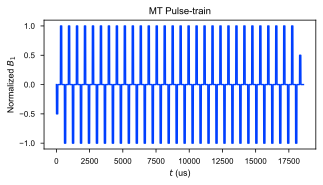

In [71]:
rf_duration = 100 # us
rf_delay = 200 # us
fs = 0.1 # 1/us
N_unit = 30

N_rf_dur = int(rf_duration*fs)
N_rf_delay = int(rf_delay*fs)

rf_p05 = [0.5]*N_rf_dur
rf_m05 = [-0.5]*N_rf_dur
rf_p = [1]*N_rf_dur
rf_m = [-1]*N_rf_dur
delay = [0]*N_rf_delay

mt_unit = rf_p+delay+rf_m+delay

#mt_pulse_train = np.array([0]+mt_unit*N_unit)
#mt_pulse_train = np.array(mt_unit*N_unit)
#mt_pulse_train = np.array(rf_m05+delay+mt_unit*N_unit+rf_p05+delay)
mt_pulse_train = np.array([0]+rf_m05+delay+mt_unit*N_unit+rf_p05+delay)
time_train = np.arange(len(mt_pulse_train))/fs


# Plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(time_train,mt_pulse_train)
ax.set_xlabel("$t$ (us)")
ax.set_ylabel("Normalized $B_1$")
ax.set_title('MT Pulse-train')

plt.tight_layout()

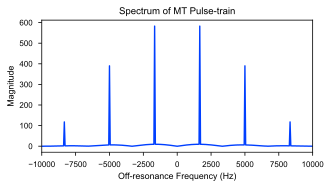

In [69]:
# FFT
spec = np.abs(np.fft.fft(mt_pulse_train))
freq = np.fft.fftfreq(len(spec), 1/fs)*1000000  # Hz

spec_shifted = np.fft.fftshift(spec)
freq_shifted = np.fft.fftshift(freq)

# Plot
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(freq_shifted,spec_shifted)
ax.set_xlim(-10000, 10000)
ax.set_xlabel("Off-resonance Frequency (Hz)")
ax.set_ylabel("Magnitude")
ax.set_title('Spectrum of MT Pulse-train')

plt.tight_layout()
